Reference from: [Logistic Regression for Image Classification](https://medium.com/swlh/logistic-regression-for-image-classification-e15d0ae59ce9)

# Imports and data reading

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

In [92]:
# Note: place archive folder with datasets in the same directory as this notebook file
df_train = pd.read_csv('./archive/fashion-mnist_train.csv')
df_test = pd.read_csv('./archive/fashion-mnist_test.csv')

y_train = df_train['label']
X_train = df_train.iloc[:, 1:]
X_train_scaled = X_train / 255.0
y_test = df_test['label']
X_test = df_test.iloc[:, 1:]
X_test_scaled = X_test / 255.0

In [93]:
# Manually enter the meaningful name of each label
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Using the raw images

## Logistic regression (without dimensionality reduction)

### Logistic Regression

In [94]:
clf = LogisticRegression(penalty='none',
                         tol=0.01, solver='saga',
                         multi_class='multinomial').fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred, average=None))

(0.8544309466421318, 0.8559000000000001, 0.8549852172163519, None)
(0.8559, 0.8559, 0.8559, None)
(array([0.79170685, 0.95870206, 0.77686796, 0.87012987, 0.77820636,
       0.93306288, 0.6468039 , 0.90729783, 0.948     , 0.93353175]), array([0.821, 0.975, 0.759, 0.871, 0.807, 0.92 , 0.597, 0.92 , 0.948,
       0.941]), array([0.80608738, 0.96678235, 0.76783005, 0.87056472, 0.79234168,
       0.9264854 , 0.62090484, 0.91360477, 0.948     , 0.937251  ]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


### Coefficient vectors of each class

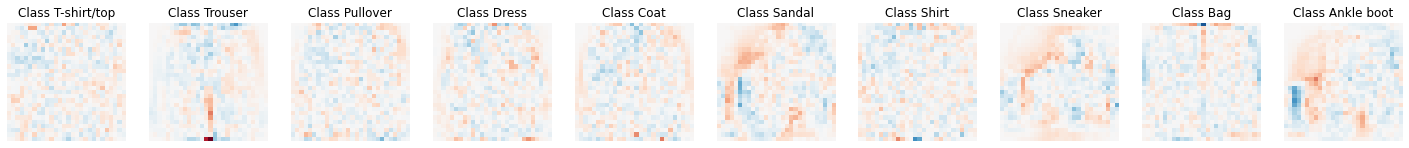

In [95]:
scale = np.max(np.abs(clf.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %s' % label[i]);

## Logistic regression with PCA

In [96]:
from sklearn.decomposition import PCA

In [97]:
# Set first 80 principle components; From data exploration phase, we found that first 80 PCs explain about 90% variance
pca = PCA(n_components=80)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
X_train_scaled_pca = pca.fit_transform(X_train_scaled.values)
X_test_scaled_pca = pca.transform(X_test_scaled.values)

### Logistic Regression

In [98]:
clf = LogisticRegression(penalty='none',
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train_scaled_pca, y_train)

y_pred = clf.predict(X_test_scaled_pca)

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred, average=None))

(0.8465517049463722, 0.8478, 0.8470546909781653, None)
(0.8478, 0.8478, 0.8478, None)
(array([0.79701493, 0.96130952, 0.76307692, 0.85770751, 0.7645933 ,
       0.92401216, 0.63269639, 0.90178571, 0.93812375, 0.92519685]), array([0.801, 0.969, 0.744, 0.868, 0.799, 0.912, 0.596, 0.909, 0.94 ,
       0.94 ]), array([0.79900249, 0.96513944, 0.75341772, 0.86282306, 0.78141809,
       0.91796678, 0.61380021, 0.90537849, 0.93906094, 0.93253968]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


### PCA visualisation of training data

In [99]:
train = pd.DataFrame()

In [100]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(y_train.size):
    # Extract the label for comparison
    if y_train[i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif y_train[i] == 1:
        results.append('Trouser')
    elif y_train[i] == 2:
        results.append('Pullover')
    elif y_train[i] == 3:
        results.append('Dress')
    elif y_train[i] == 4:
        results.append('Coat')
    elif y_train[i] == 5:
        results.append('Sandal')
    elif y_train[i] == 6:
        results.append('Shirt')
    elif y_train[i] == 7:
        results.append('Sneaker')
    elif y_train[i] == 8:
        results.append('Bag')
    elif y_train[i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(y_train[i]))

# Create a new column named result which has all meaningful results        
train['result'] = results

In [101]:
train['First Dimension'] = X_train_scaled_pca[:,0]
train['Second Dimension'] = X_train_scaled_pca[:,1]
train['Third Dimension'] = X_train_scaled_pca[:,2]

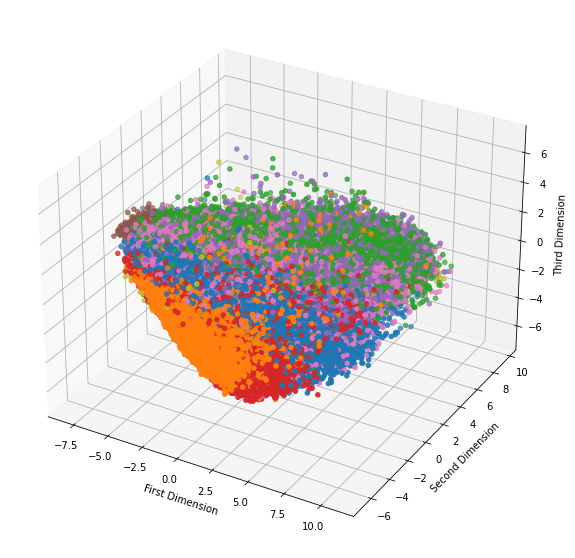

In [102]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=train["First Dimension"], 
    ys=train["Second Dimension"], 
    zs=train["Third Dimension"], 
    c=y_train, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

### PCA visualisation of test data

In [103]:
test = pd.DataFrame()

In [104]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(y_test.size):
    # Extract the label for comparison
    if y_test[i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif y_test[i] == 1:
        results.append('Trouser')
    elif y_test[i] == 2:
        results.append('Pullover')
    elif y_test[i] == 3:
        results.append('Dress')
    elif y_test[i] == 4:
        results.append('Coat')
    elif y_test[i] == 5:
        results.append('Sandal')
    elif y_test[i] == 6:
        results.append('Shirt')
    elif y_test[i] == 7:
        results.append('Sneaker')
    elif y_test[i] == 8:
        results.append('Bag')
    elif y_test[i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(y_test[i]))

# Create a new column named result which has all meaningful results        
test['result'] = results

In [105]:
test['First Dimension'] = X_test_scaled_pca[:,0]
test['Second Dimension'] = X_test_scaled_pca[:,1]
test['Third Dimension'] = X_test_scaled_pca[:,2]

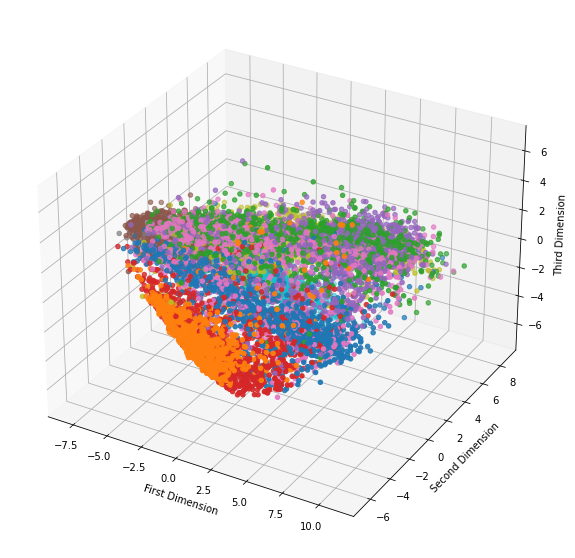

In [106]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=test["First Dimension"], 
    ys=test["Second Dimension"], 
    zs=test["Third Dimension"], 
    c=y_test, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

## Logistic regression with LDA

In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [108]:
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_scaled_lda = lda.fit_transform(X_train_scaled.values, y_train)
X_test_scaled_lda = lda.transform(X_test_scaled.values)

### Logistic Regression

In [109]:
clf = LogisticRegression(penalty='none',
                         tol=0.1, solver='saga', 
                         multi_class='multinomial').fit(X_train_scaled_lda, y_train)

y_pred = clf.predict(X_test_scaled_lda)

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred, average=None))

(0.8313418719887341, 0.8329000000000001, 0.8318837792515847, None)
(0.8329, 0.8329, 0.8329000000000001, None)
(array([0.78714859, 0.97105788, 0.75862069, 0.82905983, 0.75631068,
       0.875     , 0.63354701, 0.88911917, 0.92391304, 0.88964182]), array([0.784, 0.973, 0.726, 0.873, 0.779, 0.889, 0.593, 0.858, 0.935,
       0.919]), array([0.78557114, 0.97202797, 0.74195197, 0.85046274, 0.76748768,
       0.88194444, 0.61260331, 0.87328244, 0.92942346, 0.90408264]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


### LDA visualisation of training data

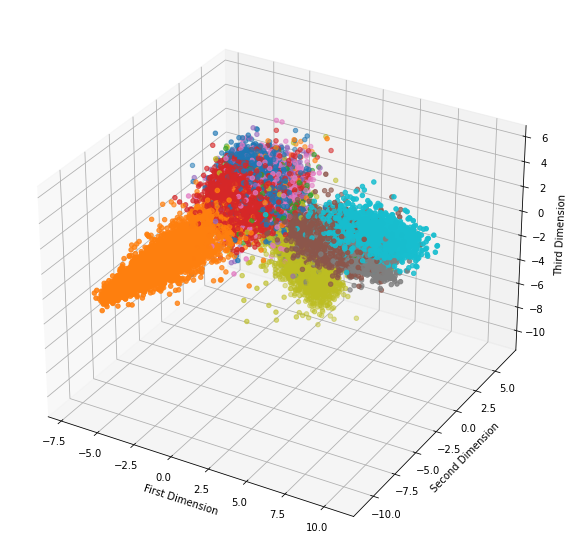

In [110]:
X_train_scaled_lda_df = pd.DataFrame(X_train_scaled_lda)

graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=X_train_scaled_lda_df[0], 
    ys=X_train_scaled_lda_df[1], 
    zs=X_train_scaled_lda_df[2], 
    c=y_train, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

### LDA visualisation of test data

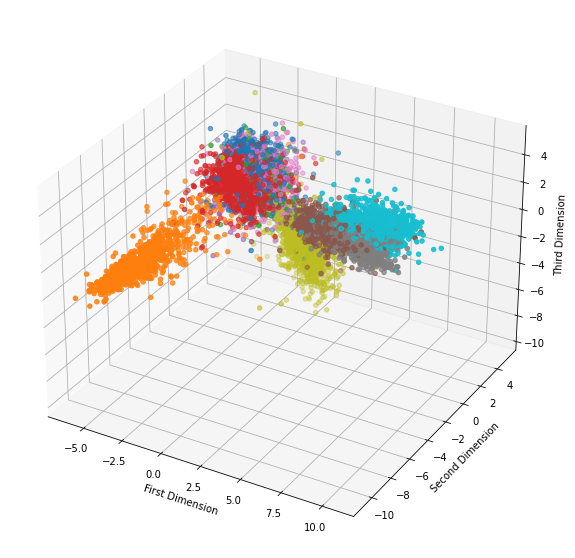

In [111]:
X_test_scaled_lda_df = pd.DataFrame(X_test_scaled_lda)

graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=X_test_scaled_lda_df[0], 
    ys=X_test_scaled_lda_df[1], 
    zs=X_test_scaled_lda_df[2], 
    c=y_test, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

# Using image edges (applying edge detection)

In [112]:
%run "./datasets/preprocess/SobelKernel.py"

In [113]:
# Note: place archive folder with datasets in the same directory as this notebook file
df_train = pd.read_csv('./archive/fashion-mnist_train.csv')
df_test = pd.read_csv('./archive/fashion-mnist_test.csv')

y_train = df_train['label']
X_train = df_train.iloc[:, 1:]
X_train_scaled = X_train / 255.0
y_test = df_test['label']
X_test = df_test.iloc[:, 1:]
X_test_scaled = X_test / 255.0

## Visualisation of image edges

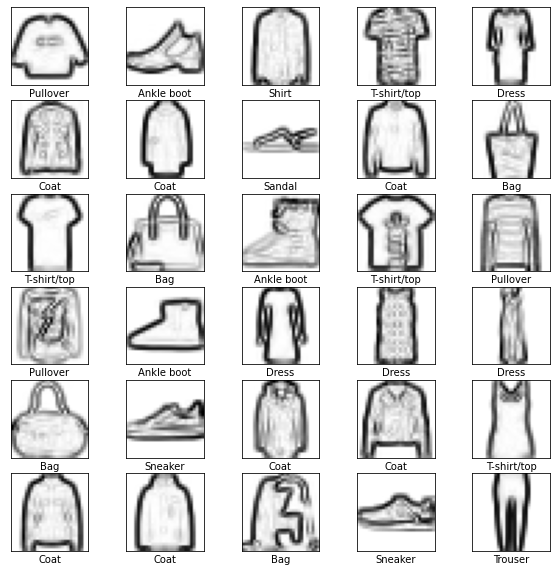

In [114]:
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_sobeled[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[y_train.iloc[i]])

## Logistic regression (without dimensionality reduction)

### Logistic Regression

In [115]:
clf = LogisticRegression(penalty='none',
                         tol=0.01, solver='saga',
                         multi_class='multinomial').fit(X_train_sobeled, y_train)

y_pred = clf.predict(X_test_sobeled)

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred, average=None))

(0.8467930825904177, 0.8489000000000001, 0.8474574673739484, None)
(0.8489, 0.8489, 0.8489, None)
(array([0.77927063, 0.95691383, 0.77653061, 0.84971098, 0.75980861,
       0.93535354, 0.64611872, 0.90981964, 0.92913386, 0.9252704 ]), array([0.812, 0.955, 0.761, 0.882, 0.794, 0.926, 0.566, 0.908, 0.944,
       0.941]), array([0.79529873, 0.95595596, 0.76868687, 0.86555447, 0.77652812,
       0.93065327, 0.60341151, 0.90890891, 0.93650794, 0.93306891]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


### Coefficient vectors of each class

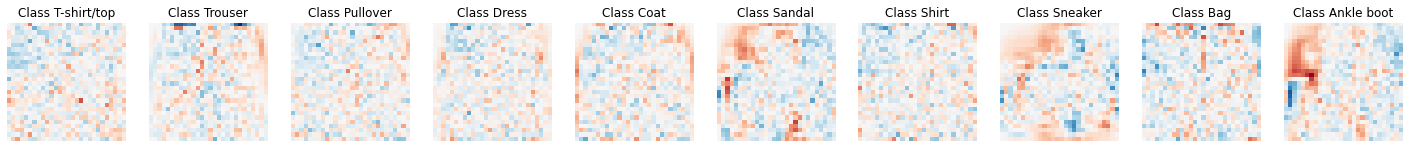

In [116]:
scale = np.max(np.abs(clf.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %s' % label[i]);

## Logistic regression with PCA

In [117]:
# Set first 80 principle components; From data exploration phase, we found that first 80 PCs explain about 90% variance
pca = PCA(n_components=80)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
X_train_sobeled_pca = pca.fit_transform(X_train_sobeled)
X_test_sobeled_pca = pca.transform(X_test_sobeled)

### Logistic Regression

In [118]:
clf = LogisticRegression(penalty='none',
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train_sobeled_pca, y_train)

y_pred = clf.predict(X_test_sobeled_pca)

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred, average=None))

(0.8292203330700254, 0.8318, 0.8298388534276716, None)
(0.8318, 0.8318, 0.8318, None)
(array([0.76343073, 0.95266868, 0.76821862, 0.84134615, 0.73719165,
       0.89832182, 0.62812872, 0.88497409, 0.92636816, 0.8915547 ]), array([0.81 , 0.946, 0.759, 0.875, 0.777, 0.91 , 0.527, 0.854, 0.931,
       0.929]), array([0.7860262 , 0.94932263, 0.76358149, 0.85784314, 0.75657254,
       0.9041232 , 0.57313757, 0.8692112 , 0.9286783 , 0.90989226]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


### PCA visualisation of training data

In [119]:
train = pd.DataFrame()

In [120]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(y_train.size):
    # Extract the label for comparison
    if y_train[i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif y_train[i] == 1:
        results.append('Trouser')
    elif y_train[i] == 2:
        results.append('Pullover')
    elif y_train[i] == 3:
        results.append('Dress')
    elif y_train[i] == 4:
        results.append('Coat')
    elif y_train[i] == 5:
        results.append('Sandal')
    elif y_train[i] == 6:
        results.append('Shirt')
    elif y_train[i] == 7:
        results.append('Sneaker')
    elif y_train[i] == 8:
        results.append('Bag')
    elif y_train[i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(y_train[i]))

# Create a new column named result which has all meaningful results        
train['result'] = results

In [121]:
train['First Dimension'] = X_train_sobeled_pca[:,0]
train['Second Dimension'] = X_train_sobeled_pca[:,1]
train['Third Dimension'] = X_train_sobeled_pca[:,2]

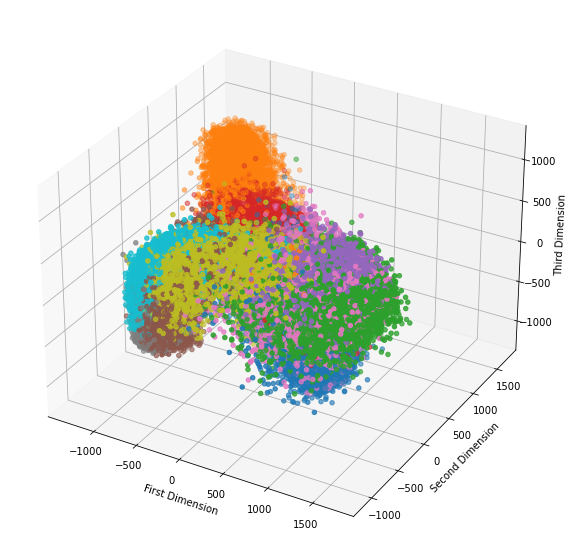

In [122]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=train["First Dimension"], 
    ys=train["Second Dimension"], 
    zs=train["Third Dimension"], 
    c=y_train, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

### PCA visualisation of test data

In [123]:
test = pd.DataFrame()

In [124]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(y_test.size):
    # Extract the label for comparison
    if y_test[i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif y_test[i] == 1:
        results.append('Trouser')
    elif y_test[i] == 2:
        results.append('Pullover')
    elif y_test[i] == 3:
        results.append('Dress')
    elif y_test[i] == 4:
        results.append('Coat')
    elif y_test[i] == 5:
        results.append('Sandal')
    elif y_test[i] == 6:
        results.append('Shirt')
    elif y_test[i] == 7:
        results.append('Sneaker')
    elif y_test[i] == 8:
        results.append('Bag')
    elif y_test[i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(y_test[i]))

# Create a new column named result which has all meaningful results        
test['result'] = results

In [125]:
test['First Dimension'] = X_test_sobeled_pca[:,0]
test['Second Dimension'] = X_test_sobeled_pca[:,1]
test['Third Dimension'] = X_test_sobeled_pca[:,2]

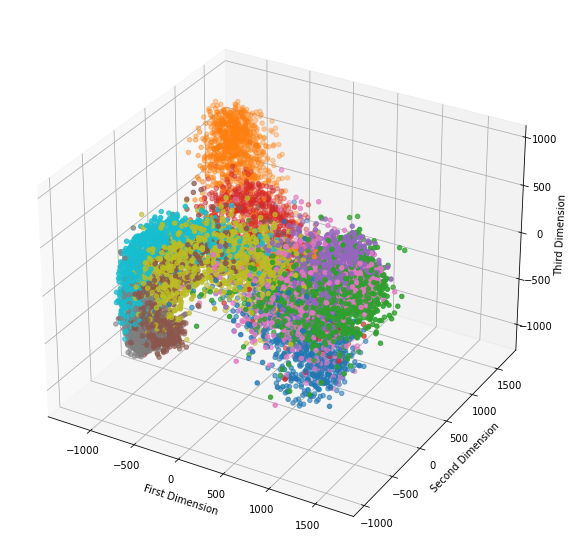

In [126]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=test["First Dimension"], 
    ys=test["Second Dimension"], 
    zs=test["Third Dimension"], 
    c=y_test, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

## Logistic regression with LDA

In [127]:
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_sobeled_lda = lda.fit_transform(X_train_sobeled, y_train)
X_test_sobeled_lda = lda.transform(X_test_sobeled)

### Logistic Regression

In [128]:
clf = LogisticRegression(penalty='none',
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train_sobeled_lda, y_train)

y_pred = clf.predict(X_test_sobeled_lda)

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred, average=None))

(0.8219955260291492, 0.8234, 0.822434665787027, None)
(0.8234, 0.8234, 0.8234, None)
(array([0.77272727, 0.94594595, 0.7602459 , 0.83886719, 0.7344358 ,
       0.88844221, 0.5923913 , 0.84790875, 0.91527094, 0.92371996]), array([0.799, 0.945, 0.742, 0.859, 0.755, 0.884, 0.545, 0.892, 0.929,
       0.884]), array([0.78564405, 0.94547274, 0.75101215, 0.84881423, 0.74457594,
       0.88621554, 0.56770833, 0.86939571, 0.92208437, 0.90342361]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


### LDA visualisation of training data

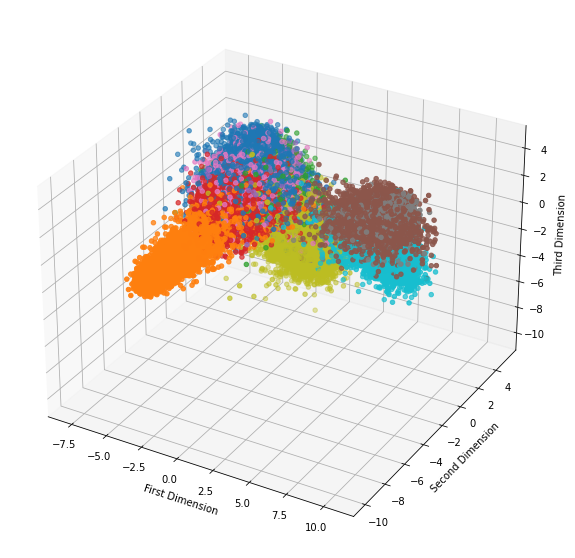

In [129]:
X_train_sobeled_lda_df = pd.DataFrame(X_train_sobeled_lda)

graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=X_train_sobeled_lda_df[0], 
    ys=X_train_sobeled_lda_df[1], 
    zs=X_train_sobeled_lda_df[2], 
    c=y_train, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

### LDA visualisation of test data

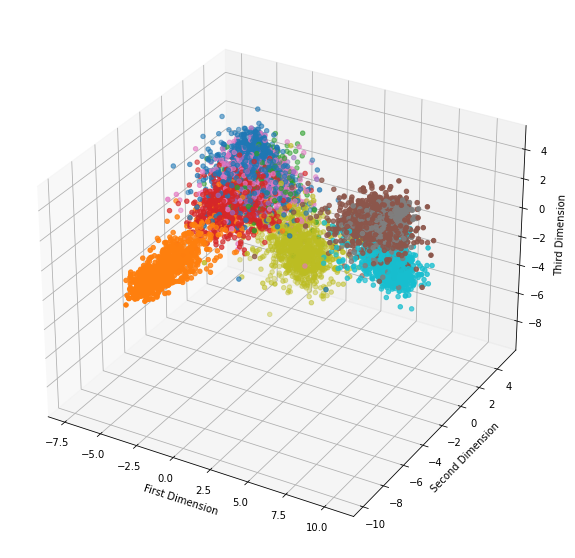

In [130]:
X_test_sobeled_lda_df = pd.DataFrame(X_test_sobeled_lda)

graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=X_test_sobeled_lda_df[0], 
    ys=X_test_sobeled_lda_df[1], 
    zs=X_test_sobeled_lda_df[2], 
    c=y_test, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

# Conclusion

From the above tests, the approximate average statistics of the different models are as follows:

<br/>

Using the original image:
|                             | Raw image data | PCA | LDA |
|-----------------------------|----------------|-----|-----|
|**Number of dimensions used**|784             |80   |9    |
|**Accuracy (approx.)**       |85.6            |84.8 |83   |
|**Prediction time (s)**      |168             |2.3  |0.5  |

<br/>

Using the image edges (processed through edge detection):
|                             | Raw image data | PCA | LDA |
|-----------------------------|----------------|-----|-----|
|**Number of dimensions used**|784             |80   |9    |
|**Accuracy (approx.)**       |84.9            |83.2 |82.3 |
|**Prediction time (s)**      |200             |2.4  |0.7  |

<br/>

We observe that the models are most accurate when using the raw image data (around 85%) i.e. no dimensionality reduction. However, running the model takes around 2-3 minutes for predictions, and we can still achieve decent performance accuracies close to that with a significantly lower number of dimensions in a shorter amount of time. Using the first 80 principal components derived from PCA, we can achieve around 83-85% accuracy in around 2.4s. Using just 9 linear discriminants derived from LDA, we can achieve around 82-83% accuracy in around 0.6s.